In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [4]:
run1 = RunManager('StatArbStrategy', 'run_0124')

In [5]:
run1.import_return_frame()
all_returns = run1.returns.copy()

In [6]:
comb = CombinationSearch()
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 20

comb.add_run(run1)
comb.start()

In [15]:
combM = CombinationSearch()
combM.set_selection_criteria('mean')
combM.params['training_epochs'] = 20

combM.add_run(run1)
combM.start()

  0%|          | 0/20 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 20/20 [03:32<00:00, 10.90s/it]


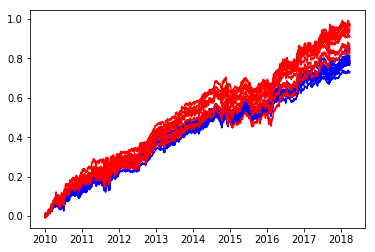

In [16]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum(), 'b')
plt.plot(combM.best_results_returns.cumsum(), 'r')
plt.show()

# Draw Down Analysis

In [42]:
# Get date bookends for tough periods in optimized model and 
# evaluate how all models did during these periods relative 
# to other periods
from gearbox.analysis_system import metrics

start_date = dt.date(2013, 1, 1)
returns = comb.best_results_returns.loc[start_date:].copy()

In [43]:
index = 0
dd, dd_days, dd_dates = metrics.draw_downs(returns.iloc[:, index].cumsum(), True)

In [58]:
# Check all drawdowns greater than 1 percent
data = pd.DataFrame(columns=['DD', 'dd_days', 'perc', 'start_date'])

for i in range(len(dd)):
    if dd[i] > -0.01:
        continue
    data.loc[i, 'DD'] = dd[i]
    data.loc[i, 'dd_days'] = dd_days[i]
    data.loc[i, 'perc'] = (all_returns.loc[dd_dates[i][0]:dd_dates[i][1]+dt.timedelta(days=1)].sum() > -0.01).mean()
    data.loc[i, 'start_date'] = dd_dates[i][0]

In [59]:
data

,DD,dd_days,perc,start_date
1,-0.025,57,0.208333,2013-01-11 00:00:00
3,-0.0122,10,0.743056,2013-04-11 00:00:00
9,-0.0136,22,0.586806,2013-07-23 00:00:00
17,-0.0149,26,0.708333,2013-12-03 00:00:00
18,-0.0164,16,0.788194,2014-01-13 00:00:00
20,-0.0165,14,0.711806,2014-02-19 00:00:00
24,-0.0209,26,0.541667,2014-04-03 00:00:00
25,-0.0136,10,0.927083,2014-05-12 00:00:00
30,-0.0101,26,0.899306,2014-06-19 00:00:00
34,-0.0473,72,0,2014-08-12 00:00:00


# KMeans Segregation

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmc = KMeans(n_clusters=2, random_state=123)

In [11]:
kmc.fit(all_returns.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [12]:
np.bincount(kmc.labels_)

array([168, 120])

In [13]:
temp = pd.DataFrame()

for i in range(kmc.cluster_centers_.shape[0]):
    temp.loc[:, i] = all_returns.loc[:, kmc.labels_ == i].mean(axis=1)

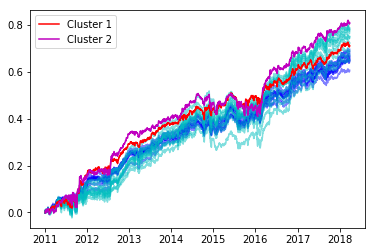

In [24]:
start_date = dt.date(2011, 1, 1)

plt.figure()
plt.plot(comb.best_results_returns.loc[start_date:].cumsum(), 'b', alpha=0.5)
plt.plot(combM.best_results_returns.loc[start_date:].cumsum(), 'c', alpha=0.5)

plt.plot(temp.loc[start_date:].cumsum().iloc[:, 0], 'r', label='Cluster 1')
plt.plot(temp.loc[start_date:].cumsum().iloc[:, 1], 'm', label='Cluster 2')

plt.legend(loc=2)
plt.show()

In [25]:
get_stats(temp)

,0,1
Total,0.9659,1.1964
Mean,0.0004,0.0005
Std,0.0046,0.0049
Skew,0.3278,0.2577
Kurt,3.0900,2.2500
Sharpe,1.4420,1.6653
Sortino,2.6144,3.0514
MinRet,-0.0241,-0.0231
WinP,0.5340,0.5378
DD%,-0.0682,-0.0988


In [26]:
temp.corr()

,0,1
0,1.000000,0.737495
1,0.737495,1.000000


In [29]:
runB1 = RunManager('StatArbStrategy', 'run_0124')
runB2 = RunManager('StatArbStrategy', 'run_0124')

In [30]:
runB1.import_return_frame()
runB2.import_return_frame()

In [31]:
runB1.returns = runB1.returns.loc[:, kmc.labels_ == 0]
runB2.returns = runB2.returns.loc[:, kmc.labels_ == 1]

In [32]:
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 10

comb1.add_run(runB1)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [02:05<00:00, 13.19s/it]


In [33]:
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 10

comb2.add_run(runB2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [03:11<00:00, 21.60s/it]


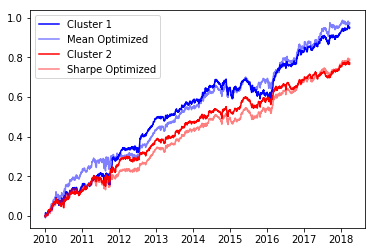

In [39]:
plt.figure()
plt.plot(comb2.best_results_returns.cumsum().iloc[:, 0], 'b', label='Cluster 1')
plt.plot(combM.best_results_returns.cumsum().iloc[:, 0], 'b', alpha=0.5, label='Mean Optimized')

plt.plot(comb1.best_results_returns.cumsum().iloc[:, 0], 'r', label='Cluster 2')
plt.plot(comb.best_results_returns.cumsum().iloc[:, 0], 'r', alpha=0.5, label='Sharpe Optimized')

plt.legend(loc=2)
plt.show()

### Correlation

In [43]:
print(comb.best_results_returns.corr().min().min())
print(combM.best_results_returns.corr().min().min())
print(comb1.best_results_returns.corr().min().min())
print(comb2.best_results_returns.corr().min().min())

0.9491617893030238
0.9438526535729257
0.9689398861529289
0.964689675410888


In [52]:
orig = comb.best_results_returns.join(combM.best_results_returns, rsuffix='r')
update = comb1.best_results_returns.join(comb2.best_results_returns, rsuffix='r')

In [53]:
print(orig.corr().min().min())
print(update.corr().min().min())

0.8881782998711546
0.6671086587571837


In [55]:
orig[['0', '0r']].corr()

,0,0r
0,1.000000,0.897817
0r,0.897817,1.000000


In [56]:
update[['0', '0r']].corr()

,0,0r
0,1.000000,0.680778
0r,0.680778,1.000000


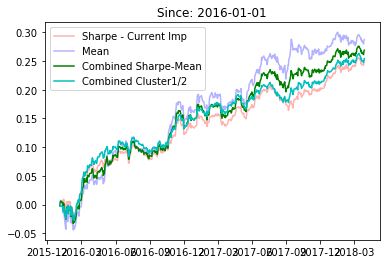

In [86]:
start_date = dt.date(2016, 1, 1)

x1 = orig[['0', '0r']].mean(axis=1)
x2 = update[['0', '0r']].mean(axis=1)

plt.figure()

plt.plot(orig.loc[start_date:]['0'].cumsum(), 'r', alpha=0.3, label='Sharpe - Current Imp')
plt.plot(orig.loc[start_date:]['0r'].cumsum(), 'b-', alpha=0.3, label='Mean')

plt.plot(x1.loc[start_date:].cumsum(), 'g', label='Combined Sharpe-Mean')
plt.plot(x2.loc[start_date:].cumsum(), 'c', label='Combined Cluster1/2')

plt.legend(loc=2)
plt.title('Since: {}'.format(start_date))
plt.show()

In [110]:
xx = orig[['0', '0r']].join(update[['0r', '0']], rsuffix='update').join(x1.to_frame()).join(x2.to_frame(), rsuffix='x1')

In [113]:
xx.columns = ['OrigSharpe', 'OrigMean', 'Cluster1', 'Cluster2', 'OrigComb', 'ClusterComb']

In [114]:
get_stats(xx.dropna())

,OrigSharpe,OrigMean,Cluster1,Cluster2,OrigComb,ClusterComb
Total,0.7900,0.9737,0.9502,0.7713,0.8818,0.8608
Mean,0.0004,0.0005,0.0005,0.0004,0.0004,0.0004
Std,0.0039,0.0052,0.0047,0.0038,0.0044,0.0039
Skew,0.1955,0.1017,0.2600,0.1864,0.1537,0.2128
Kurt,2.3500,2.5400,2.1900,2.5700,2.3300,2.4700
Sharpe,1.5546,1.4416,1.5384,1.5377,1.5289,1.6761
Sortino,2.7884,2.5350,2.8087,2.7508,2.7192,3.0315
MinRet,-0.0189,-0.0267,-0.0218,-0.0212,-0.0221,-0.0190
WinP,0.5473,0.5419,0.5381,0.5511,0.5458,0.5429
DD%,-0.0585,-0.0756,-0.1076,-0.0579,-0.0639,-0.0775


In [115]:
get_stats(xx.loc[dt.date(2016, 1, 1):].dropna())

,OrigSharpe,OrigMean,Cluster1,Cluster2,OrigComb,ClusterComb
Total,0.2503,0.2872,0.3277,0.1806,0.2688,0.2541
Mean,0.0004,0.0005,0.0006,0.0003,0.0005,0.0005
Std,0.0036,0.0053,0.0046,0.0036,0.0043,0.0037
Skew,-0.0792,-0.1319,0.0250,-0.2309,-0.1667,-0.1475
Kurt,1.6300,1.6000,1.3300,2.6600,1.2600,1.8800
Sharpe,1.9484,1.5209,1.9928,1.4250,1.7553,1.9175
Sortino,3.4387,2.6208,3.6123,2.4122,3.0331,3.3370
MinRet,-0.0141,-0.0238,-0.0194,-0.0179,-0.0162,-0.0167
WinP,0.5709,0.5514,0.5603,0.5390,0.5745,0.5603
DD%,-0.0431,-0.0518,-0.0458,-0.0365,-0.0393,-0.0350
